In [0]:
!python mlip_setup_env.py

joeran2 2516e9dc7229abc20ce5bfb8c8f92ae6
Data not present, retrieving...
  0% 0.00/1.25M [00:00<?, ?B/s]
100% 1.25M/1.25M [00:00<00:00, 86.9MB/s]
 99% 981M/992M [00:14<00:00, 72.5MB/s]
100% 992M/992M [00:14<00:00, 70.9MB/s]
 99% 980M/993M [00:13<00:00, 80.8MB/s]
100% 993M/993M [00:14<00:00, 73.2MB/s]
 99% 983M/991M [00:13<00:00, 61.3MB/s]
100% 991M/991M [00:13<00:00, 74.6MB/s]
  0% 0.00/1.32M [00:00<?, ?B/s]
100% 1.32M/1.32M [00:00<00:00, 190MB/s]
  0% 0.00/1.18M [00:00<?, ?B/s]
100% 1.18M/1.18M [00:00<00:00, 169MB/s]
  0% 0.00/944 [00:00<?, ?B/s]
100% 944/944 [00:00<00:00, 955kB/s]
  0% 0.00/1.28M [00:00<?, ?B/s]
100% 1.28M/1.28M [00:00<00:00, 178MB/s]
 99% 977M/986M [00:27<00:00, 97.5MB/s]
100% 986M/986M [00:27<00:00, 38.0MB/s]
  0% 0.00/1.70k [00:00<?, ?B/s]
100% 1.70k/1.70k [00:00<00:00, 1.77MB/s]
  0% 0.00/1.30M [00:00<?, ?B/s]
100% 1.30M/1.30M [00:00<00:00, 181MB/s]
  0% 0.00/4.72k [00:00<?, ?B/s]
100% 4.72k/4.72k [00:00<00:00, 4.62MB/s]
Archive:  Data//train_image_data_0.parquet

In [0]:
cd code/hw1

/content/code/hw1


In [0]:
%tensorflow_version 2.x

import numpy as np
import pandas as pd
import os

from sklearn.model_selection import train_test_split

from starter_eda_model_funcs import MultiOutputDataGenerator
from helper import to_one_hot, flow_from_prep, preview_data_aug
from helper import preview_from_prep, train_from_prep
from preprocessing import perform_preprocessing

TensorFlow 2.x selected.


# Perform preprocessing explicitly

In [0]:
from preprocessing import perform_preprocessing

roi_size = 64
padding = 10

preprocess_args = dict(
    image_width=roi_size+padding*2,
    image_height=roi_size+padding*2,
    padding=padding,
)

# requires less RAM than parquet method, about ~4 GB
# also this method seems faster, because here
# the time required to save the result is included
# in the time below, while above it is only the conversion time.
name = f"prep_{roi_size}_{padding}"
perform_preprocessing(preprocess_args, out='png', prep_folder=name)

# Preview data augmentation

Flowing from Data/prep_64_10/
Converting grapheme_root to one-hot encoding
Converting vowel_diacritic to one-hot encoding
Converting consonant_diacritic to one-hot encoding
Found 184772 validated image filenames.


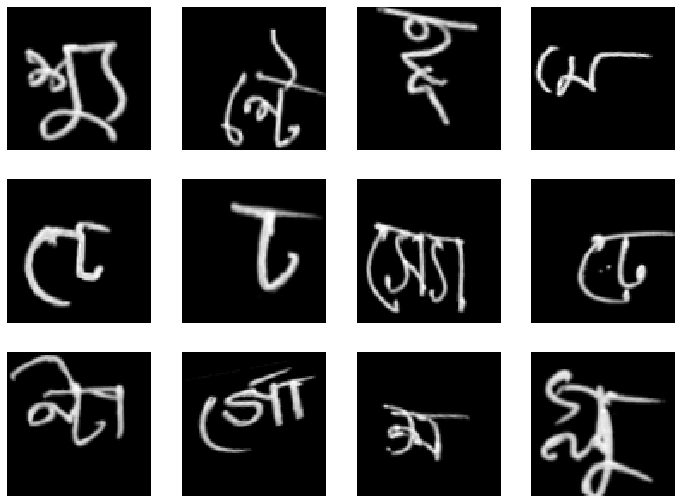

In [0]:
datagen_args = dict(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=8,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range = 0.15, # Randomly zoom image 
    width_shift_range=0.15,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.15,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False,
    shear_range=8, #Shear Intensity (Shear angle in counter-clockwise direction in degrees)
)

roi_size = 64
padding = 10

preprocess_args = dict(
    image_width=roi_size+padding*2,
    image_height=roi_size+padding*2,
    padding=padding,
)

name = f"prep_{roi_size}_{padding}/"
preview_from_prep(preprocess_args, datagen_args, prep_folder=name)

# Prepare all 

In [0]:
if False:
    datagen_args = dict(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=8,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.15, # Randomly zoom image 
        width_shift_range=0.15,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.15,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False,
        shear_range=8, #Shear Intensity (Shear angle in counter-clockwise direction in degrees)
    )

    roi_size_options = [32, 64, 96, 128, 160]
    padding_size_options = [5, 10, 15, 21, 26]

    for roi_size, padding in zip(roi_size_options, padding_size_options):
        preprocess_args = dict(
            image_width=roi_size + padding*2,
            image_height=roi_size + padding*2,
            padding=padding,
        )

        name = f"prep_{roi_size}_{padding}/"
        # perform preprocessing
        perform_preprocessing(preprocess_args, out='png', prep_folder=name)
        # preview preprocessing
        preview_from_prep(preprocess_args, datagen_args, prep_folder=name)

# Train models

Start training of prep_32_5/...
Performing data preprocessing...


Converting grapheme_root to one-hot encoding
Converting vowel_diacritic to one-hot encoding
Converting consonant_diacritic to one-hot encoding
Found 175735 validated image filenames.
Found 25105 validated image filenames.


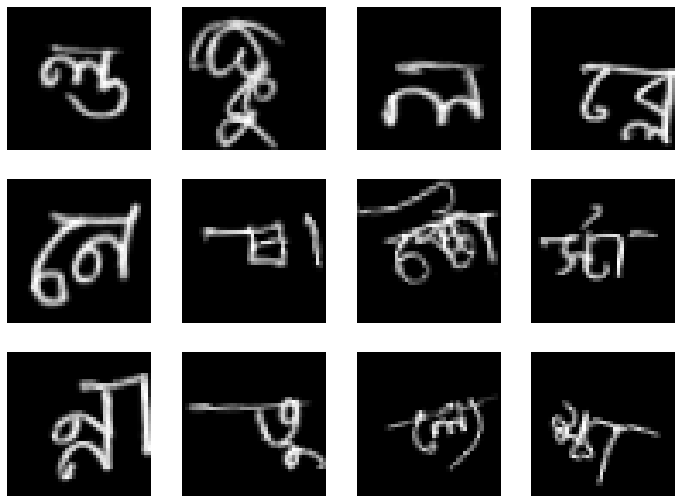

  {'out_root': '...', 'out_vowel': '...', 'out_consonant': '...'}
    to  
  ['...', '...', '...']
  {'out_root': '...', 'out_vowel': '...', 'out_consonant': '...'}
    to  
  ['...', '...', '...']
Train for 686 steps, validate for 98 steps
Epoch 1/30
685/686 [============================>.] - ETA: 0s - loss: 2.7084 - out_root_loss: 4.3135 - out_vowel_loss: 1.1733 - out_consonant_loss: 1.0331 - out_root_acc: 0.0534 - out_vowel_acc: 0.5724 - out_consonant_acc: 0.6471WARNING:tensorflow:Reduce LR on plateau conditioned on metric `val_global_accuracy` which is not available. Available metrics are: loss,out_root_loss,out_vowel_loss,out_consonant_loss,out_root_acc,out_vowel_acc,out_consonant_acc,val_loss,val_out_root_loss,val_out_vowel_loss,val_out_consonant_loss,val_out_root_acc,val_out_vowel_acc,val_out_consonant_acc,lr
  {'out_root': '...', 'out_vowel': '...', 'out_consonant': '...'}
    to  
  ['...', '...', '...']
686/686 [==============================] - 148s 215ms/step - loss: 2.7077

In [0]:
datagen_args = dict(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=8,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range = 0.15, # Randomly zoom image 
    width_shift_range=0.15,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.15,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False,
    shear_range=8, #Shear Intensity (Shear angle in counter-clockwise direction in degrees)
)

roi_size_options = [32, 64, 96, 128, 160]
padding_size_options = [5, 10, 15, 21, 26]
cross_val_parts = 8 # for 12.5% validation data and 87.5% train data
cross_val_num = 0 # which part (shuffled) from [0, ..., n-1]

for roi_size, padding in zip(roi_size_options, padding_size_options):
    preprocess_args = dict(
        image_width=roi_size + padding*2,
        image_height=roi_size + padding*2,
        padding=padding,
    )

    prep_folder = f"prep_{roi_size}_{padding}/"
    name        = f"prep_{roi_size}_{padding}-cv{cross_val_num}/{cross_val_parts}"
    
    # train model
    print(f"Start training of {name}...")
    model = train_from_prep(name = name, prep_folder=prep_folder,
                            datagen_args = datagen_args,
                            preprocess_args = preprocess_args, 
                            cross_val_parts = cross_val_parts,
                            cross_val_num = cross_val_num)

In [0]:
print([32, 64, 96, 128, 160])